<a href="https://colab.research.google.com/github/TomChen7896/final_abalone/blob/main/Data_Processing_and_EDA_cc7896.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the Age of Abalones based on Physical Data

###Data Pre-processing and Preliminary Examination

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

The license of UCI Machine Learning expired, so my original codes for retriving the DataFrame from the repository could not be used. I put the original codes below.
```
pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# drop rows with null values
df = df.dropna()

# display the first few rows of the DataFrame
df.head()
```
I will use the ```read_url``` codes to retrive the DataFrame from my GitHub Repository instead.


In [2]:
# URL to the CSV file
url = "https://raw.githubusercontent.com/TomChen7896/final_abalone/refs/heads/main/abalone.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(url)

# Display the first few rows
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# save the dataframe into a csv file in Google Drive and then store in the GitHub Repository
df.to_csv('/content/drive/My Drive/abalone.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
# check the min and max of the rings on shells which could indicate age
print(df['Rings'].min())
print(df['Rings'].max())

1
29


In [6]:
# Check the unique values in the 'Sex' column
print(df['Sex'].unique())

# Count the occurrences of each unique value
print(df['Sex'].value_counts())

['M' 'F' 'I']
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [7]:
# check the min and max of longest shell measurement
print(df['Length'].min())
print(df['Length'].max())

0.075
0.815


In [8]:
# check the min and max of diameter
print(df['Diameter'].min())
print(df['Diameter'].max())

0.055
0.65


In [9]:
# check the min and max of height
print(df['Height'].min())
print(df['Height'].max())

0.0
1.13


In [10]:
# check the min and max of the weight of the whole abalone
print(df['Whole_weight'].min())
print(df['Whole_weight'].max())

0.002
2.8255


In [11]:
# check the min and max of the weight of meat
print(df['Shucked_weight'].min())
print(df['Shucked_weight'].max())

0.001
1.488


In [12]:
# check the min and max of gut weight (after bleeding)
print(df['Viscera_weight'].min())
print(df['Viscera_weight'].max())

0.0005
0.76


In [13]:
# check the min and max of the shell weight after being dried
print(df['Shell_weight'].min())
print(df['Shell_weight'].max())

0.0015
1.005


## Exploratory Data Analysis

In [14]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


###Descriptive Statistics

In [15]:
# mean of rings
df['Rings'].mean()

9.933684462532918

In [16]:
# median of rings
df['Rings'].median()

9.0

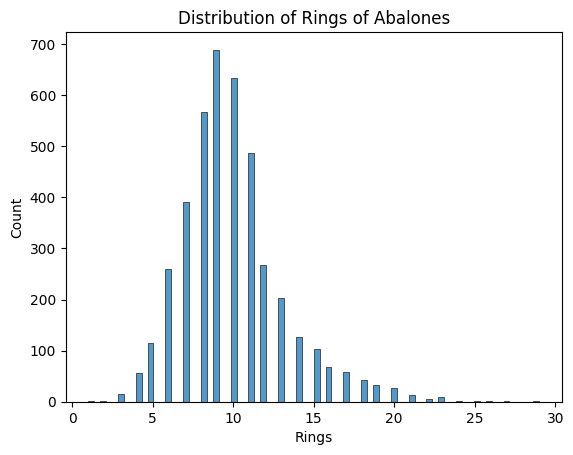

In [17]:
# histogram of rings of abalones
sns.histplot(data = df, x = 'Rings')
plt.title('Distribution of Rings of Abalones')

plt.savefig('ring_dist.png')

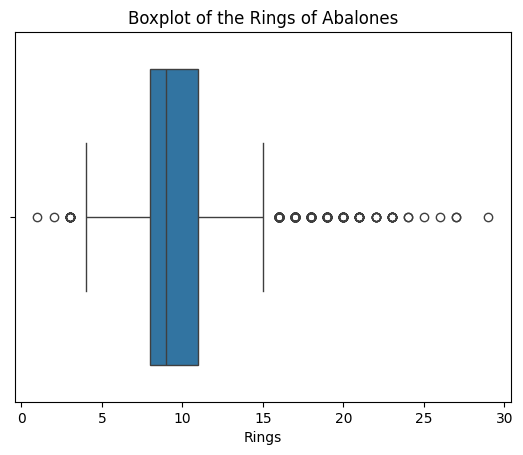

In [18]:
# box plot of rings
sns.boxplot(data = df, x = 'Rings')
plt.title('Boxplot of the Rings of Abalones')

plt.savefig('ring_box.png')

###Initial Visualizations

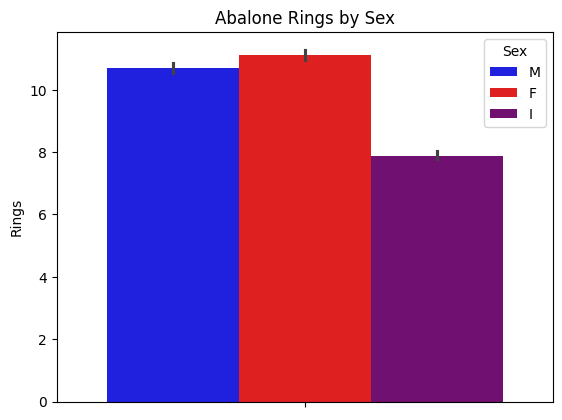

In [19]:
# plot sex (male/female/infant) against rings
sns.barplot(data = df, y = 'Rings', hue = 'Sex', palette = ['blue', 'red', 'purple'])
plt.title('Abalone Rings by Sex')

plt.savefig('ring_sex.png')

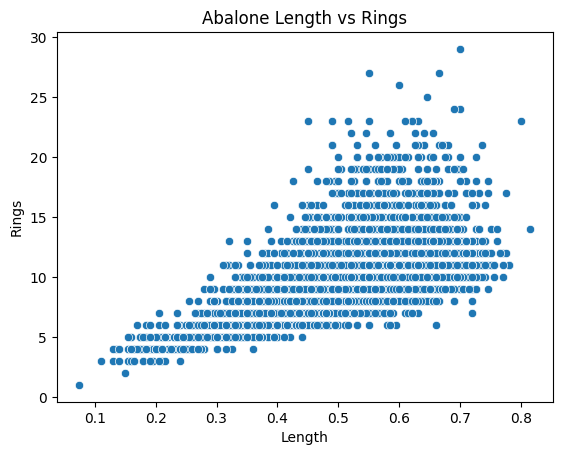

In [20]:
# plot length against rings
sns.scatterplot(data = df, x = 'Length', y = 'Rings')
plt.title('Abalone Length vs Rings')

plt.savefig('ring_length.png')

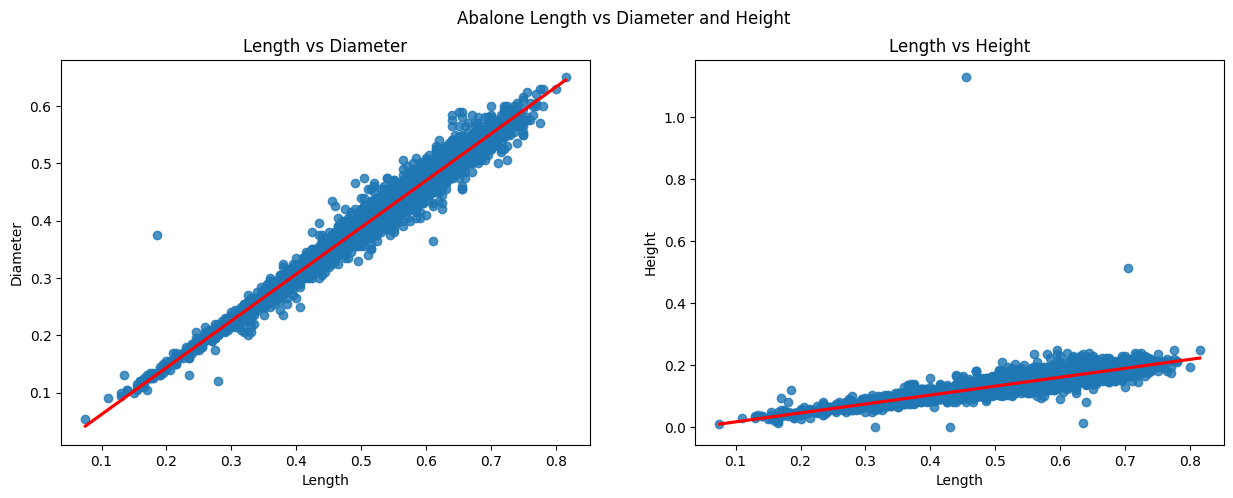

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df, x = 'Length', y = 'Diameter', line_kws = {'color': 'red'}, ax = ax[0])
sns.regplot(data = df, x = 'Length', y = 'Height', line_kws = {'color': 'red'}, ax = ax[1])
plt.suptitle('Abalone Length vs Diameter and Height')
ax[0].set_title('Length vs Diameter')
ax[1].set_title('Length vs Height')

plt.savefig('length_dia_height.png')

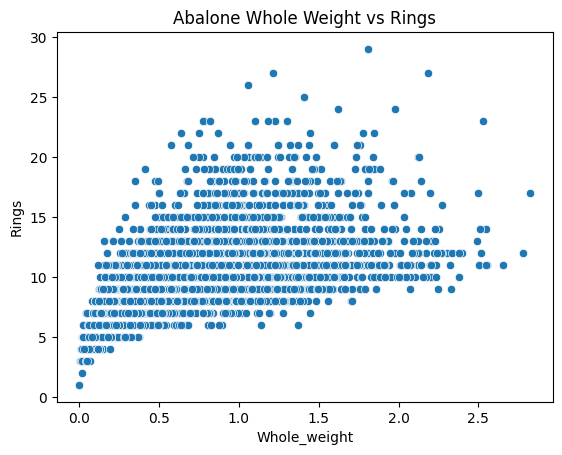

In [22]:
# plot whole weight against rings
sns.scatterplot(data = df, x = 'Whole_weight', y = 'Rings')
plt.title('Abalone Whole Weight vs Rings')

plt.savefig('ring_wh_w.png')

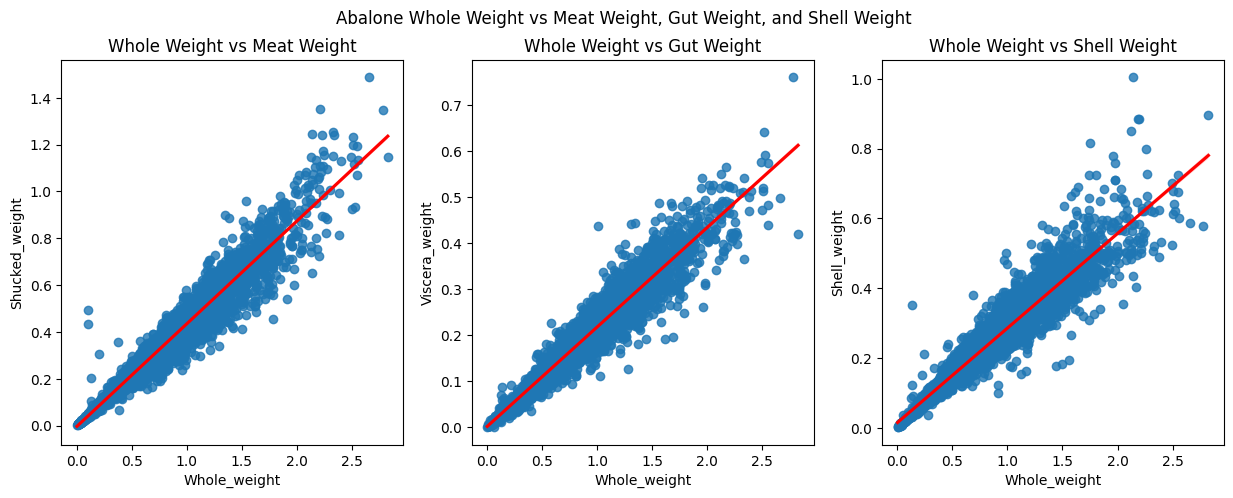

In [23]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.regplot(data = df, x = 'Whole_weight', y = 'Shucked_weight', line_kws = {'color': 'red'}, ax = ax[0])
sns.regplot(data = df, x = 'Whole_weight', y = 'Viscera_weight', line_kws = {'color': 'red'}, ax = ax[1])
sns.regplot(data = df, x = 'Whole_weight', y = 'Shell_weight', line_kws = {'color': 'red'}, ax = ax[2])
plt.suptitle('Abalone Whole Weight vs Meat Weight, Gut Weight, and Shell Weight')
ax[0].set_title('Whole Weight vs Meat Weight')
ax[1].set_title('Whole Weight vs Gut Weight')
ax[2].set_title('Whole Weight vs Shell Weight')

plt.savefig('wh_me_gut_shl.png')